In [11]:
#6章　GLMの応用範囲をひろげる

#この教科書の実装はR言語によるものとなっている。
#それをPythonにて実装しなおす

#########この章の簡単な説明######
"""""
3章では、架空の植物の種子数がポアソン分布にしたがっているとして、体のサイズや施肥処理を説明変数とした
ポアソン回帰を実装した。
ここでは、二項分布を用いたGLMを実装する。

下記のデータdの変数は
N・・・観測種子数(すべての個体について8で固定)
y・・・生存種子数
x・・・個体の大きさ
f・・・肥料の処理をしたかどうか(Tが施肥処理あり、Cがなし)

観測種子数8のうち、y個の種子が生存しているというモデル。
yはポアソン分布に従い、個体によって平均λは異なるという仮定のもとでモデルは構築されている。
yは0-8をとる。

終盤ではほかの分布のGLMも試す。
"""""
import pandas as pd
import requests 

d = pd.read_csv("http://hosho.ees.hokudai.ac.jp/~kubo/stat/iwanamibook/fig/binomial/data4a.csv")
d.head()

,N,y,x,f
0,8,1,9.76,C
1,8,6,10.48,C
2,8,5,10.83,C
3,8,6,10.94,C
4,8,1,9.37,C


In [12]:
#各変数の型の確認
d.dtypes

N      int64
y      int64
x    float64
f     object
dtype: object

In [13]:
#変数の概要を調べる
d.describe()

,N,y,x
count,100.0,100.000000,100.000000
mean,8.0,5.080000,9.967200
std,0.0,2.743882,1.088954
min,8.0,0.000000,7.660000
25%,8.0,3.000000,9.337500
50%,8.0,6.000000,9.965000
75%,8.0,8.000000,10.770000
max,8.0,8.000000,12.440000


<Figure size 720x288 with 0 Axes>

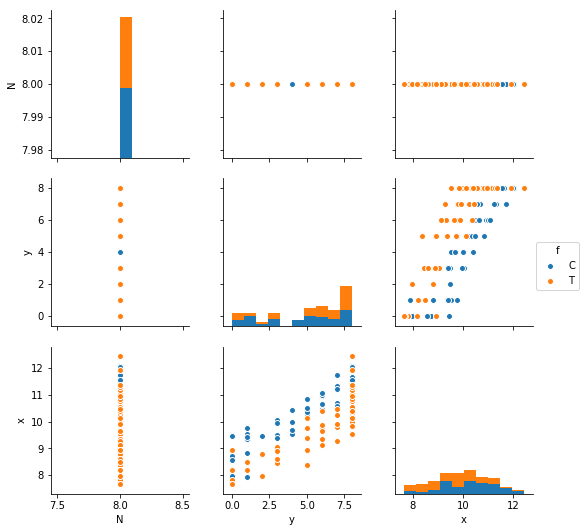

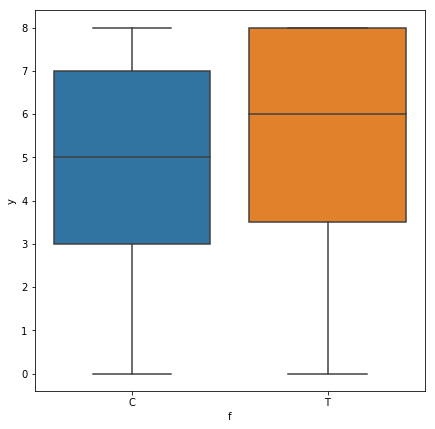

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

#散布図
plt.figure(figsize=(10,4))
sns.pairplot(d,hue="f")

#箱ひげ図
plt.figure(figsize=(7,7))
sns.boxplot(d.f,d.y)

#施肥処理ありのほうが生存種子数が多いことがわかる

C:\Users\hirou\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hirou\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hirou\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 720x288 with 0 Axes>

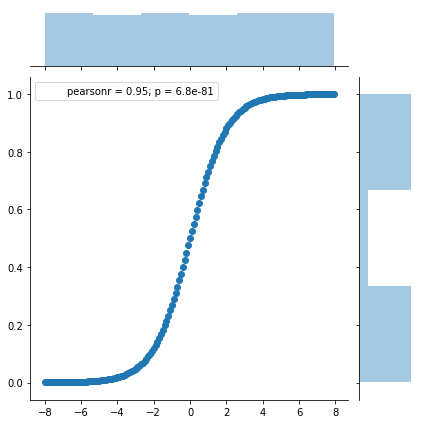

In [15]:
import numpy as np

#ロジスティック関数の形を確認するために描写してみる
#arrangeは等差数列を作る

z = np.arange(-8, 8, 0.1)
logit = (1/(np.ones(z.size)+np.exp(-z)))

plt.figure(figsize=(10,4))
sns.jointplot(z,logit)


In [16]:
import statsmodels.api as sm
#fをダミー変数化
d.loc[d["f"]=="C","f"]="0"
d.loc[d["f"]=="T","f"]="1"
d.f=d.f.astype(int)
d.head()

,N,y,x,f
0,8,1,9.76,0
1,8,6,10.48,0
2,8,5,10.83,0
3,8,6,10.94,0
4,8,1,9.37,0


In [18]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf 

#smfのコンビネーションの表現はy + I(N - y)となる。
#このformulaの表記はpastyの表記らしく、"+"は組み合わせを示す。I()で囲うことでただの足し算とかができる。
#Rの表記にならってるらしい。
#尤度は二項分布で、パラメータp(生存確率)がロジスティック関数で表現される。
#p=1/1+exp(-α-βx-f)で表現される。
#二項分布によるGLMはリンク関数がデフォルトでlogitになる。

log_model = smf.glm(formula="y + I(N - y) ~ x + f",data=d, family=sm.families.Binomial())
log_res = log_model.fit()
print('Parameters: ', log_res.params)
print(log_res.summary())
print(log_res.summary2())

Parameters:  Intercept   -19.536066
x             1.952406
f             2.021506
dtype: float64
                 Generalized Linear Model Regression Results                  
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -133.11
Date:                Tue, 09 Oct 2018   Deviance:                       123.03
Time:                        16:30:55   Pearson chi2:                     109.
No. Iterations:                     6   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.5361      1.414  

In [20]:
#二項回帰で使えるリンク関数
sm.families.Binomial().links

[statsmodels.genmod.families.links.logit,
 statsmodels.genmod.families.links.probit,
 statsmodels.genmod.families.links.cauchy,
 statsmodels.genmod.families.links.log,
 statsmodels.genmod.families.links.cloglog,
 statsmodels.genmod.families.links.identity]

In [22]:
#交差項を入れたモデル
#X*fとすると、x+f+x:fと同じ意味になる。
log_model2 = smf.glm(formula="y + I(N - y) ~ x * f",data=d, family=sm.families.Binomial())
log_res2 = log_model2.fit()
print('Parameters: ', log_res2.params)
print(log_res2.summary())
print(log_res2.summary2())

Parameters:  Intercept   -18.523322
x             1.852509
f            -0.063764
x:f           0.216338
dtype: float64
                 Generalized Linear Model Regression Results                  
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -132.81
Date:                Tue, 09 Oct 2018   Deviance:                       122.43
Time:                        16:33:46   Pearson chi2:                     109.
No. Iterations:                     6   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  

In [24]:
e = pd.read_csv("http://hosho.ees.hokudai.ac.jp/~kubo/stat/iwanamibook/fig/binomial/data4b.csv")
e.head()

,y,x,A
0,57,0.68,10.3
1,64,0.27,15.6
2,49,0.46,10.0
3,64,0.45,14.9
4,82,0.74,14.0


In [26]:
#オフセット項を入れたモデル。オフセット項はoffset=で指定する。
#smfではデフォルトで定数項がつくことに注意
#formula="y ~ x -1" という風に、-変数名とすればその項目は消せる。定数項は-1で消える。
#定数項のみで回帰する場合、formula="y ~ 1"とする。

offset_model = smf.glm(formula="y ~ x ",offset=np.log(e['A']),data=e, family=sm.families.Poisson())
offset_res = offset_model.fit()
print('Parameters: ', offset_res.params)
print(offset_res.summary())
print(offset_res.summary2())

Parameters:  Intercept    0.973082
x            1.038270
dtype: float64
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -323.17
Date:                Tue, 09 Oct 2018   Deviance:                       81.608
Time:                        17:04:58   Pearson chi2:                     81.5
No. Iterations:                     4   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9731      0.045     21.600      0.000     

In [30]:
#ガンマ分布のGLM

import pyper as pr

#Rdata形式はR専用のデータなのでPythonで読み込むことはできない。
#Rdataをpythonで読み込むにはpyperを使うのが楽だと思われる。
#これはRdata読み込み用ではなく、Rの処理をpythonから行うというもの。
#httpなのでloadだけでは読み込めず、url関数を使う必要がある。(read.csvなどはそのままネット上のデータを扱える。)

r = pr.R(use_numpy='True', use_pandas='True')
r('load(url("http://hosho.ees.hokudai.ac.jp/~kubo/stat/iwanamibook/fig/gamma/d.RData"))')
rdata = pd.DataFrame(r.get("d"))
rdata.columns = ["x", "y"]
rdata['logx'] = np.log(rdata.x)
gamma_model = smf.glm(formula='y ~ logx', data=rdata, family=sm.families.Gamma(link=sm.families.links.log))
gamma_model_fit = gamma_model.fit()

print(gamma_model_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   50
Model:                            GLM   Df Residuals:                       48
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                         0.32508
Method:                          IRLS   Log-Likelihood:                 58.471
Date:                Tue, 09 Oct 2018   Deviance:                       17.251
Time:                        17:16:53   Pearson chi2:                     15.6
No. Iterations:                    18   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0403      0.119     -8.759      0.000      -1.273      -0.808
logx           0.6832      0.068      9.992      0.0

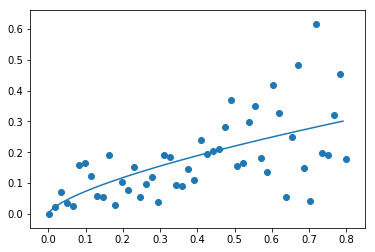

In [31]:
import matplotlib.pyplot as plt
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.scatter(rdata.x, rdata.y)
xx = np.arange(min(rdata.x), max(rdata.x),0.01)
ax1.plot(xx, np.exp(-1.0403+0.6832*np.log(xx)))